# Лабораторная работа 3

## Библиотеки Seaborn, Matplotlib

__Указание__: все графики к задачам ниже обязательно должны иметь корректные названия осей и подписи по осям, при
необходимости – легенды. Также учитывается модификация цветовой гаммы, маркеров и других аспектов внешнего вида графиков.

**1.** Загрузите набор данных `tips`, содержащий информацию о размере чаевых в ресторане.

Выполните следующие задания:
   - Постройте гистограмму, показывающую зависимость между днями недели и суммой общего счета, с учетом времени суток;
   
   - Отобразите зависимость размера чаевых от общей стоимости заказа (можно использовать график `sns.relplot`);
   
   - Покажите с помощью точечной диаграммы связь между количеством людей, выполнивших один заказ, и размером чаевых, размер точек должен зависеть от времени суток, а цвет - от дня недели. Полученный результат сохратите в файл png;
   
   - Нарисуйте `relplot`, показывающий соотношение общего счета и размера чаевых. Указания: цвет точек зависит от времени суток, маркер `style` показывает, является ли клиент курильщиком, количество графиков зависит от количества людей за столиком (для этого преобразуйте числовые данные соответствующего столбца в категориальные, значения передайте с параметр `col`).
   
   - Объедините в одну картинку следующие графики: 1) ящик с усами и диаграмма рассеивания (`sns.stripplot`); 2) скрипичная диаграмма и диаграмма рассеивания (`sns.swarmplot`). Каждый график должен отражать зависимость пола человека, оплачивающего счет, от размера чаевых.

In [4]:
# Ваш код здесь

**2.** Рассмотрите пример построения поверхности в трехмерном пространстве с помощью `Matplotlib`.

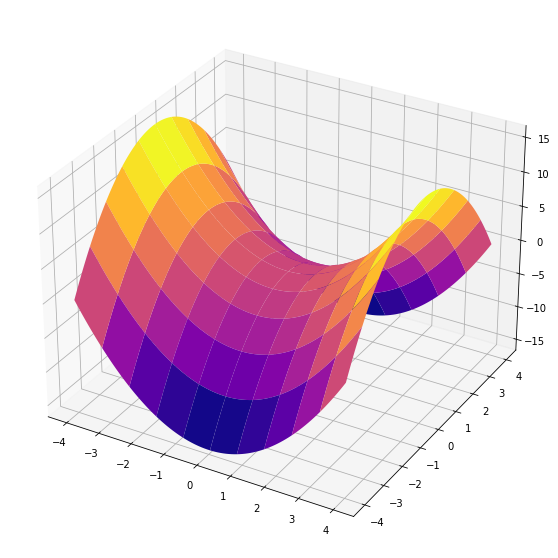

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
# уравнение поверхности
f = lambda x, y: x ** 2 - y ** 2
# создаём полотно для рисунка
fig = plt.figure(figsize = (10, 10))
# создаём рисунок пространства с поверхностью
ax = fig.add_subplot(1, 1, 1, projection = '3d')
# размечаем границы осей для аргументов
xval = np.linspace(-4, 4, 100)
yval = np.linspace(-4, 4, 100)
# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
x, y = np.meshgrid(xval, yval)
# приравниваем z к функции от x и y 
z = f(x, y)
# создаём поверхность
surf = ax.plot_surface(
            # отмечаем аргументы и уравнение поверхности
            x, y, z, 
            # шаг прорисовки сетки
            # - чем меньше значение, тем плавнее
            # - будет градиент на поверхности
            rstride = 10,
            cstride = 10,
            # цветовая схема plasma
            cmap = cm.plasma)


**Задание:** Построить с помощью библиотеки `Matplotlib` эллиптический параболоид  в отличной от предствленного выше примера цветовой гамме (формула задания поверхности x ** 2 + y ** 2). Подпишите график, оси.


In [ ]:
# Ваш код здесь

## Библиотеки functools, itertools

**3.** Напишите функцию для вычисления факториала числа. 

Сформируйте файл, содержащий 10000 чисел в диапазоне от 10 до 30. 

Подсчитайте факториалы каждого числа из исходного файла и запишите их во второй файл. 

Замеряйте время выполнения этих действий с использованием functools.lru_cache и без него. Поэкспериментируйте с параметрами, например, размером кэша.

In [6]:
# Ваш код здесь

**4.** Салат - это смесь двух-семи ингредиентов. Выведите рецепты всех различных салатов которые можно составить имея ингредиенты, перечисленные в файле (не менее 15 ингридиентов).

In [ ]:
# Ваш код здесь

**5.** Посчитать произведение квадратов всех натуральных чисел $\le N$.
Реализовать с использованием itertools и без, для каждого варианта замерить время 1000 запусков при $N = 10000$, усреднить время.

In [ ]:
# Ваш код здесь

**6.** Даны пять текстовых файлов - произведения разных авторов. Авторов и произведения выбрать самостоятельно, произведения лучше брать большого размера. Требуется вывести 10 самых распространённых биграмм (сочетаний 2 букв) у каждого автора. Вывести совпадения для каждой пары авторов. Вывести биграммы, уникальные в Топ-10 для каждого автора.

In [ ]:
import os
import string
import itertools
import functools
import chardet
import collections

# Определяем путь к директории с текстовыми файлами
path = "texts"

# Определяем функцию для чтения файла и создания списка биграмм
def process_file(filename):
    with open(filename, 'rb') as f:
        rawdata = f.read()
        result = chardet.detect(rawdata)
        encoding = result['encoding']
    with open(filename, 'r', encoding=encoding) as f:
        text = f.read().lower()
        text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
        words = text.split()
        bigrams = []
        for word in words:
            pairs = itertools.zip_longest(word, word[1:])
            bigrams.extend([''.join(pair) for pair in pairs if pair[1] is not None])
        return bigrams


# Определяем функцию для подсчета количества вхождений биграмм
def count_bigrams(bigrams):
    return functools.reduce(lambda d, b: d.update([(b, d.get(b, 0) + 1)]) or d, bigrams, {})

# Определяем функцию для нахождения Топ-10 биграмм
def top_10_bigrams(counts):
    return [k for k, v in sorted(counts.items(), key=lambda item: -item[1])[:10]]


authors = {}
for filename in os.listdir(path):
    author = filename.split('.')[0]
    bigrams = process_file(os.path.join(path, filename))
    counts = count_bigrams(bigrams)
    top_10 = top_10_bigrams(counts)
    authors[author] = top_10


for pair in itertools.combinations(authors.keys(), 2):
    common_bigrams = set(authors[pair[0]]) & set(authors[pair[1]])
    if common_bigrams:
        print(f"Распространенные биграммы между {pair[0]} и {pair[1]}: {common_bigrams}")

for author, top_10 in authors.items():
    unique_bigrams = set()
    for other_author, other_top_10 in authors.items():
        if author != other_author:
            unique_bigrams |= set(other_top_10)
    unique_bigrams -= set(top_10)
    if unique_bigrams:
        print(f"Уникальные биграммы для {author}: {unique_bigrams}")

# Создаем словарь, где ключ - имя автора, значение - список его биграмм
authors = {}
for filename in os.listdir(path):
    author = filename.split('.')[0]
    bigrams = process_file(os.path.join(path, filename))
    authors[author] = bigrams

# Выводим 10 самых распространенных биграмм для каждого автора
for author, bigrams in authors.items():
    counts = collections.Counter(bigrams)
    print(f"Топ-10 биграмм для {author}:")
    for bigram, count in counts.most_common(10):
        print(f"{bigram}: {count}")
